# Understanding signal processing basics using Python
Below is some code used to gain some intuition on two basic tools of signal processing: the Discrete Fourier Transform and the Discrete Wavelet Transform.

This was used for the course ECS766P - Data Mining at Queen Mary University of London.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

For the DFT we will use `scipy`, and for the DWT we can use a package called `pywt`.

https://docs.scipy.org/doc/scipy/tutorial/fft.html

https://pywavelets.readthedocs.io/en/latest/

In [2]:
from scipy.fft import fft, ifft
import pywt

# Understanding the Discrete Fourier Transform
In order to improve our understanding of the DFT, we are going to see an application in a toy example.

We start by creating a cosine wave.

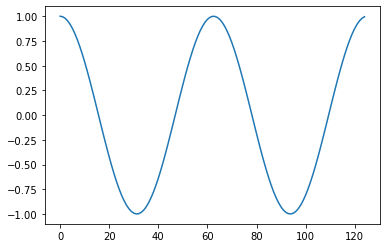

In [3]:
N=125
k=2
x = np.array([np.cos(2*np.pi*k*i/N) for i in range(N)])
plt.plot(x)

Recall the expression for the DFT. Notice how the above wave exactly matches the real part of the complex factors in the sum.


\begin{aligned}X_{k}=\sum _{n=0}^{N-1}x_{n}\cdot \left[\cos \left({\frac {2\pi }{N}}kn\right)-i\cdot \sin \left({\frac {2\pi }{N}}kn\right)\right].\end{aligned}

The signal was created with $k=2$. That means that the magnitude of the real part of $X_2$ should be large. Try to understand why the magnitude will become smaller for $X_i, i\neq k$.

If we compute the DFT of the signal we will see that the magnitude is indeed largest at the expected component.

In [7]:
xf=fft(x)
np.argsort(abs(xf[:int(N/2)]))[::-1]

array([ 2, 43, 44, 39, 38, 41, 21, 45, 22, 25, 26, 42, 46,  1, 40, 48, 50,
       33, 34, 23, 53, 37, 20,  0, 10,  8, 29, 32, 58, 27, 13, 51, 30, 35,
       28, 57,  9, 54, 36, 49, 17,  3, 55, 24, 61, 60, 15,  5, 52, 31,  7,
       12, 14, 56, 11, 47,  4,  6, 18, 59, 19, 16])

Notice that we are only considering half of the output. That is because the DFT is symmetric, so for the purpose of the above analysis we will obtain redundant information if we inspect all coefficients.

Try to relate the output of the cell below to this symmetry.

In [8]:
np.argsort(abs(xf))[::-1]

array([123,   2,  82,  43,  44,  81,  39,  86,  38,  87,  41,  84,  21,
       104,  45,  80, 103,  22,  25, 100,  26,  99,  42,  83,  46,  79,
       124,   1,  40,  85,  77,  48,  75,  50,  92,  33,  91,  34, 102,
        23,  72,  53,  37,  88, 105,  20,   0,  10, 115, 117,   8,  96,
        29,  93,  32,  58,  67,  27,  98, 112,  13,  74,  51,  95,  30,
        35,  90,  97,  28,  68,  57, 116,   9,  62,  63,  71,  54,  89,
        36,  76,  49,  17, 108, 122,   3,  70,  55,  24, 101,  61,  64,
        60,  65, 110,  15,   5, 120,  73,  52,  31,  94,   7, 118,  12,
       113,  14, 111,  69,  56,  11, 114,  47,  78,   4, 121, 119,   6,
       107,  18,  59,  66, 106,  19, 109,  16])

Let us now add a high frequency perturbation to the signal.

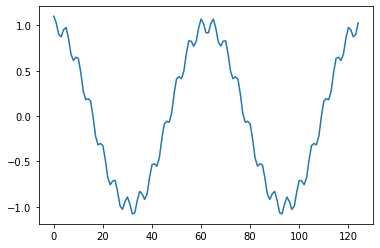

In [9]:
k=25
noise  = np.array([np.cos(k*2*np.pi*i/N) for i in range(N)])
y = x+.1*noise
plt.plot(y)

We will compute the DFT of the perturbed signal to detect the newly added component.

If we compare the new coefficients to those of the original transform, we will notice $100$ and $25$ near the top ones, which were not previously there (note we are no longer taking half of the output here, as we want to remove all perturbatory frequencies). $25$ is exactly the value of $k$ for the perturbation, and $100$ is just $N-25$.

In [10]:
yf=fft(y)
coeffs = np.argsort(abs(yf))[::-1]
coeffs

array([  2, 123, 100,  25,  44,  81,  86,  39,  82,  43,  41,  84,  80,
        45,  42,  83,  26,  99, 102,  23,  63,  62,  87,  38,  85,  40,
        48,  77,  76,  49, 103,  22,  21, 104,   6, 119,  51,  74,  46,
        79,  33,  92,  53,  72,  64,  61,   0,  60,  65,  34,  91,  95,
        30,  14, 111, 122,   3,  31,  94,  35,  90, 120,   5, 108,  17,
        24, 101, 113,  12,  96,  29, 117,   8,  28,  97,   7, 118,  98,
        27, 121,   4,  52,  73,  37,  88,  15, 110,  78,  47,  66,  59,
       109,  16,  68,  57,  55,  70, 116,   9,  11, 114,  10, 115,  50,
        75,  93,  32,  19, 106,  56,  69,   1, 124,  89,  36, 107,  18,
        67,  58,  71,  54,  20, 105,  13, 112])

If we remove said components and reconstruct the signal using the inverse transform, we obtain a clean wave.

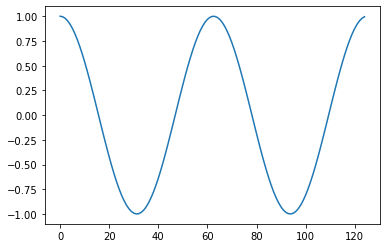

In [11]:
yf[25]=0
yf[N-25]=0
xf=ifft(yf)
plt.plot(xf.real)

# Understanding the Discrete Wavelet Transform

The following slides might help you understand the DWT. Be sure to check them out.

http://ceadserv1.nku.edu/longa/classes/2008spring/mat225/projects2/HaarTransform.pdf

First, let us analyze how DWT algorithms work, step by step. We will use the very simple signal $x$, defined below.

In [12]:
x=np.array([1,2,3,4,5,6,7,8])

We will use a Haar wavelet, which is the easiest to understand.

In [13]:
wavelet='haar'
pywt.wavedec(x, wavelet, level=1)

[array([ 2.12132034,  4.94974747,  7.77817459, 10.60660172]),
 array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])]

The algorithm works by applying two operations to the input vector recursively. Here we have set the level of the transform to 1, which means that we do not recurse. We will do that later.

The function `wavedec` outputs a list of arrays: the first array is the vector of "averages"; the rest are the vectors of "details". 

In the cell below we see how these are computed. For the "averages", we group the elements of the vector by pairs, add them up and normalize. For the "details", we compute the difference. Note how this matches the output of `wavedec`.

Observe as well the dimensions of the vectors. The length of the sequence has decreased by a factor of 2.

Finally, note that it is possible to fully recover the original sequence using this information. Try to figure out how.

In [14]:
y1 = []
d1 = []
for i in [0,2,4,6]:
    avg = np.sum([x[i], x[i+1]])/np.sqrt(2)
    diff = (x[i] - x[i+1])/np.sqrt(2)
    y1.append(avg)
    d1.append(diff)
y1, d1

([2.1213203435596424,
  4.949747468305833,
  7.7781745930520225,
  10.606601717798211],
 [-0.7071067811865475,
  -0.7071067811865475,
  -0.7071067811865475,
  -0.7071067811865475])

Let us now compute the transform to one additional level.

In [15]:
wavelet='haar'
pywt.wavedec(x, wavelet, level=2)

[array([ 5., 13.]),
 array([-2., -2.]),
 array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])]

To obtain this, the algorithm just takes one recursive step on the vector of "averages" output by the step before. To demonstrate this, see the code below.

We obtain a new vector of "averages" and a new vector of "details". We can actually discard the previous vector of "averages" (the one output by the transform at level 1), and we will still be able to perfectly reconstruct our signal. Try to figure out why.

In [16]:
y2 = []
d2 = []
for i in [0,2]:
    avg = np.sum([y1[i], y1[i+1]])/np.sqrt(2)
    diff = (y1[i] - y1[i+1])/np.sqrt(2)
    y2.append(avg)
    d2.append(diff)
y2, d2

([5.0, 12.999999999999998], [-2.0, -1.9999999999999991])

We can encode these transformations using a matrix.

In [17]:
H = 1/np.sqrt(2)*np.array([ [1,1], [1,-1]])
H

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [18]:
for i in [0,2,4,6]:
    print(H.dot(x[i:i+2]))

[ 2.12132034 -0.70710678]
[ 4.94974747 -0.70710678]
[ 7.77817459 -0.70710678]
[10.60660172 -0.70710678]


It is also possible to express the 2-level transform using a single matrix.

In [19]:
s2 = np.sqrt(2)
H = 1/2*np.array([ [1,1,1,1], [1,1,-1,-1], [s2,-s2,0,0], [0,0,s2,-s2]])
H

array([[ 0.5       ,  0.5       ,  0.5       ,  0.5       ],
       [ 0.5       ,  0.5       , -0.5       , -0.5       ],
       [ 0.70710678, -0.70710678,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.70710678, -0.70710678]])

In [20]:
for i in [0,4]:
    print(H.dot(x[i:i+4]))

[ 5.         -2.         -0.70710678 -0.70710678]
[13.         -2.         -0.70710678 -0.70710678]


### Using the DWT to clean a signal
We are going to create a sine wave and perturb it with high-frequency noise. We will then try to remove the noise using the DWT.

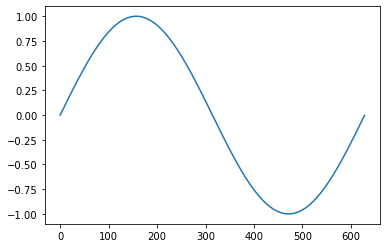

In [21]:
x=np.sin(np.arange(0,2*np.pi,1e-2))
plt.plot(x)

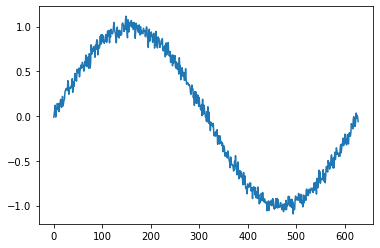

In [22]:
noisy_x = x + np.random.normal(size=len(x), loc=0, scale=0.05)
plt.plot(noisy_x)

The DWT can only be computed meaningfully up to a certain level.

Fortunatenly, we can ask the `pywt` to determine the maximum level for us.

In [24]:
wavelet='haar'
ml=pywt.dwt_max_level(len(x), wavelet)
coeffs = pywt.wavedec(noisy_x, wavelet, level=ml)
coeffs

[array([  2.64154029, -10.90083202]),
 array([13.48182966,  0.        ]),
 array([-2.52423591,  6.89711987,  0.        ]),
 array([-2.81636218,  1.11482857,  3.55248816,  0.72507932, -2.93070371]),
 array([-1.11152423, -0.80311884, -0.0194247 ,  0.73011961,  1.24227445,
         1.25349688,  0.6865964 , -0.13907672, -0.87343027, -1.14316054]),
 array([-0.42143085, -0.47163137, -0.34413757, -0.21134858, -0.19054168,
         0.11668957,  0.20863856,  0.37211212,  0.42312929,  0.3874802 ,
         0.4511152 ,  0.33515657,  0.26640536,  0.22398276,  0.07231522,
        -0.14059605, -0.26117132, -0.39627808, -0.43986821, -0.28477635]),
 array([-0.1278207 , -0.28653992, -0.13347602, -0.09189613, -0.06521516,
        -0.09688014,  0.01703723, -0.08505567, -0.11635062,  0.01830227,
         0.11422183,  0.0114082 , -0.01585333,  0.00402144,  0.035527  ,
         0.1005943 ,  0.14436824,  0.17242468,  0.10638528,  0.16216675,
         0.19969603,  0.13878977,  0.15805559,  0.12110114,  0.19969

The underlying signal we want to recover is a low-frequency sine wave. Thus, what we want to do is remove some of the high-frequency "details".

Fortunately the DWT, as implemented by `pywt`, stores "details" of different frequencies in different arrays, so we can distinguish them and treat them separately.

Let us try to remove only the highest frequency "details", which are stored in the last array of the output.

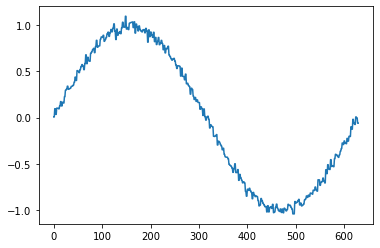

In [28]:
coeffs_ = []
for i in range(len(coeffs)):
    coeffs_.append(np.copy(coeffs[i]))
coeffs_[-1]*=0
approx_x = pywt.waverec(coeffs_, wavelet)
plt.plot(approx_x)

Not bad, but the signal still retains a bit of noise. Let us try to remove some more components.

In [29]:
coeffs_[-2]*=0
coeffs_[-3]*=0
coeffs_[-4]*=0

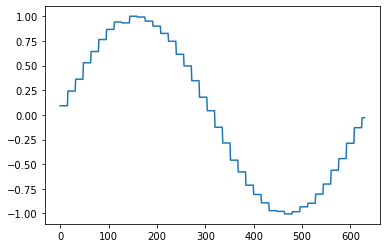

In [30]:
approx_x = pywt.waverec(coeffs_, wavelet)
plt.plot(approx_x)

The signal is now less noisy, but the reconstruction is a little bit coarse. We can try the same, but using a Daubechies2 wavelet, for better results.

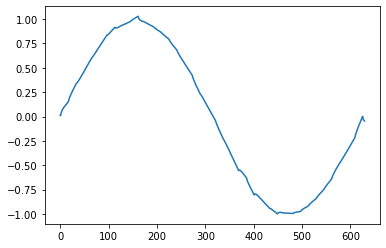

In [35]:
wavelet='db2'
ml=pywt.dwt_max_level(len(x), wavelet)
coeffs = pywt.wavedec(noisy_x, wavelet, level=ml)
coeffs_ = []
for i in range(len(coeffs)):
    coeffs_.append(np.copy(coeffs[i]))
for i in range(1,5):
    coeffs_[-i]*=0
approx_x = pywt.waverec(coeffs_, wavelet)
plt.plot(approx_x)